# Create a sparse chaos by integration

The goal of this example is to show how to create a sparse polynomial chaos when we estimate its coefficients by integration. We show how to use the `CleaningStrategy` class. 

## Polynomial chaos expansion
Let $g : \mathcal{X} \rightarrow \mathbb{R}$ be a function where $\mathcal{X} \subseteq \mathbb{R}^p$ is the domain of $g$. Let $f$ be a probability density function on $\mathcal{X}$. Let $T$ be the iso-probabilistic transformation from the physical space $\mathcal{X}$ to the standard space $\mathcal{\bar{X}}$:
$$
\xi = T(\boldsymbol{x}) \in \mathcal{\bar{X}}
$$
for any $\boldsymbol{x} \in \mathcal{X}$. 
Let $h$ be the function defined by the equation :
$$
h(\boldsymbol{\xi}) = \left(g \circ T^{-1}\right)(\boldsymbol{\xi})
$$
for any $\boldsymbol{\xi} \in \mathcal{\bar{X}}$.
The polynomial chaos decomposition of $h$ is ([Blatman, 2009] page 73) :
$$
h(\boldsymbol{\xi}) \approx \sum_{\boldsymbol{\alpha} \in \mathbb{N}^p} a_\boldsymbol{\alpha} \psi_\boldsymbol{\alpha}(\boldsymbol{\xi})
$$
where $\boldsymbol{\alpha} = (\alpha_1, ..., \alpha_p) \in \mathbb{N}^p$ is a multiindex, $a_\boldsymbol{\alpha} \in \mathbb{R}$ is the coefficient and $\psi_\boldsymbol{\alpha} : \mathcal{\bar{X}} \rightarrow \mathbb{R}$ is a multivariate polynomial.

## Truncated expansion
In practice, we cannot consider an infinite series and must truncate the decomposition at a given order. Only a selection of coefficients must be kept. This leads to a subset of all possible multiindices. In the remainder of this text, we call this selection the _multiindex set_. 

Several multiindex sets can be considered. A simple method is to truncate the polynomial up to a given maximum total degree $d \in \mathbb{N}$. Let $\mathcal{A}^{d}$ be the multi-index set defined by 
$$
\mathcal{A}^{d} = \left\{ \boldsymbol{\alpha} \in \mathbb{N}^p \; | \; \|\boldsymbol{\alpha}\|_1 \leq d\right\}
$$
where 
$$
\|\boldsymbol{\alpha}\|_d = \alpha_1 + ... + \alpha_p
$$
is the 1-norm of the multi-index $\boldsymbol{\alpha}$. 
Therefore, the truncated polynomial chaos expansion is:
$$
h(\boldsymbol{\xi}) \approx \sum_{\boldsymbol{\alpha} \in \mathcal{A}^{d}} a_\boldsymbol{\alpha} \psi_\boldsymbol{\alpha}(\boldsymbol{\xi}).
$$
In order to ensure a low error, we may choose a large value of the parameter $P$. This, however, leads to a large number of coefficients $\boldsymbol{\alpha} \in \mathcal{A}^{d}$ to estimate. More precisely, the number of coefficients to estimate is ([Blatman, 2009] page 73) :
$$
\textrm{card}\left(\mathcal{A}^{d}\right) = {p + d \choose d} = \frac{(p + d)!}{p! d!}
$$
where $p!$ is the factorial number of $p$. 

## Low-rank polynomial chaos expansion
For any $\boldsymbol{\alpha} \in \mathbb{N}^p$, let $\|\boldsymbol{\alpha}\|_0$ be the rank of the multiindex, that is, the number of nonzero components:
$$
\|\boldsymbol{\alpha}\|_0 = \sum_{i = 1}^p \mathbb{1}_{\alpha_i > 0}.
$$
The multiindex set of maximum total degree $d \in \mathbb{N}$ and maximum rank $j \in \mathbb{N}$ is ([Blatman, 2009] page 74) is :
$$
\mathcal{A}^{d,j} = \left\{ \boldsymbol{\alpha} \in \mathbb{N}^p \; | \; \|\boldsymbol{\alpha}\|_1 \leq d, \; \; \|\boldsymbol{\alpha}\|_0 \leq j\right\}.
$$
Therefore, the rank-$j$ polynomial chaos expansion is:
$$
h(\boldsymbol{\xi}) \approx \sum_{\boldsymbol{\alpha} \in \mathcal{A}^{d,j}} a_\boldsymbol{\alpha} \psi_\boldsymbol{\alpha}(\boldsymbol{\xi}).
$$
The rank is now an hyperparameter of the model: [Blatman, 2009] suggests to use $j = 2, 3, 4$. An example of low-rank PCE for the G-Sobol' function is given in [Blatman, 2009] page 75. 

_Note._ How to create a low-rank PCE in OpenTURNS?

## Model selection
If $\textrm{card}\left(\mathcal{A}^{d}\right)$ is large, many coefficients may be poorly estimated, which may reduce the quality of the metamodel. We may want to select a subset of the coefficients which best predict the output. In other words, we may compute a subset 
$$
\mathcal{A} \subseteq \mathcal{A}^{d}
$$
such that ([Blatman, 2009] page 86) :
$$
h(\boldsymbol{\xi}) \approx \sum_{\boldsymbol{\alpha} \in \mathcal{A}} a_\boldsymbol{\alpha} \psi_\boldsymbol{\alpha}(\boldsymbol{\xi}).
$$

An enumeration rule is a function from the set of integers $k$ to the corresponding set of multiindices $\boldsymbol{\alpha}$. More precisely, let $r : \mathbb{N} \rightarrow \mathbb{N}^p$ be the function such that :
$$
r(k) = \boldsymbol{\alpha}
$$
for any $k \geq 0$. 
Let $K \in \mathbb{N}$ be a parameter representing the number of coefficients considered in the selection. Given an enumeration rule for the multiindices $\boldsymbol{\alpha}$, at most $K$ multiindices will be considered. Let $\mathcal{A}_K$ be the corresponding multiindex set :
$$
\mathcal{A}_K = \left\{ \boldsymbol{\alpha} \; | \; r^{-1}(\boldsymbol{\alpha}) = k \leq K \right\}.
$$

Let $\epsilon > 0$ be a parameter representing the minimum relative value of a significant coefficient $a_\boldsymbol{\alpha}$. The `CleaningStrategy` uses the following criteria to select the coefficients :
$$
\mathcal{A}_\epsilon = 
\left\{
|a_\boldsymbol{\alpha}| \leq \epsilon \max_{ a_\boldsymbol{\alpha} \in \mathcal{A}_K } |a_\boldsymbol{\alpha}|
\right\}
$$
where $\epsilon$ is the significance factor, default is $\epsilon = 10^{-4}$.

## Sparsity index
The sparsity index of a multiindex set is the ratio of the cardinality of the multiindex set to the cardinality of the multiindex set of the equivalent multiindex with maximum total degree. For a given multiindex set $\mathcal{A}$, let $d$ be the maximum 1-norm of multiindices in the set :
$$
d := \textrm{max}_{\boldsymbol{\alpha} \in \mathcal{A}} \|\boldsymbol{\alpha}\|_1.
$$
The index of sparsity of $\mathcal{A}$ is ([Blatman, 2009] eq. 4.42 page 86) :
$$
\textrm{IS}(\mathcal{A}) = \frac{\textrm{card}(\mathcal{A})}{\textrm{card}\left(\mathcal{A}^d\right)}.
$$

_Note._ The index of sparsity as defined by [Blatman, 2009] is close to zero when the model is very sparse. The following complementary indicator is close to 1 when the model is very sparse:
$$
\textrm{IS}_{\textrm{c}}(\mathcal{A}) = 1 - \frac{\textrm{card}(\mathcal{A})}{\textrm{card}\left(\mathcal{A}^d\right)}.
$$



## References
- Géraud Blatman, Adaptive sparse polynomial chaos expansions for uncertainty propagation and sensitivity analysis. Thèse. Université Blaise Pascal - Clermont II. (2009)
- Müller, A. C., & Guido, S. (2016). Introduction to machine learning with Python: a guide for data scientists. " O'Reilly Media, Inc.".

In [1]:
import openturns as ot
import openturns.viewer as otv
from openturns.usecases import ishigami_function as ishigami_function
import itertools

The following function takes a polynomial chaos result as input and prints a given maximum number of coefficients of this polynomial. It can take into account a threshold, so that we can avoid to print coefficients which are very close to zero.

In [2]:
def printCoefficientsTable(
    polynomialChaosResult, maximum_number_of_printed_coefficients=10, threshold=0.0
):
    """
    Print the coefficients of the polynomial chaos.

    Parameters
    ----------
    polynomialChaosResult : ot.FunctionalChaosResult
        The polynomial chaos expansion.
    maximum_number_of_printed_coefficients : int
        The maximum number of printed coefficients.
    threshold : float, stricly positive
        If a coefficient has an absolute value striclty greater than the 
        threshold, it is printed. 
    """
    basis = polynomialChaosResult.getOrthogonalBasis()
    coefficients = polynomialChaosResult.getCoefficients()
    enumerate_function = basis.getEnumerateFunction()
    indices = polynomialChaosResult.getIndices()
    nbcoeffs = indices.getSize()
    print("Total number of coefficients : ", nbcoeffs)
    print("# Indice, Multi-indice, Degree : Value")
    print_index = 0
    for k in range(nbcoeffs):
        multiindex = enumerate_function(indices[k])
        degree = sum(multiindex)
        c = coefficients[k][0]
        if abs(c) > threshold:
            print("#%d, %s (%s) : %s" % (k, multiindex, degree, c))
            print_index += 1
        if print_index > maximum_number_of_printed_coefficients:
            break
    return

The next function computes the polynomial chaos Q2 score using simple validation on a test sample generated by Monte-Carlo sampling. The actual computation is performed by the `MetaModelValidation` class. 

In [3]:
def compute_polynomial_chaos_Q2(
    polynomialchaos_result, g_function, input_distribution, n_valid=1000
):
    """
    Compute the Q2 score of the polynomial chaos. 
    

    Parameters
    ----------
    polynomialChaosResult : ot.FunctionalChaosResult
        The polynomial chaos expansion.
    g_function : ot.Function
        The function.
    input_distribution : ot.Distribution
        The input distribution.
    n_valid : int
        The number of simulations to compute the Q2 score.
    
    Returns
    -------
    Q2 : float
        The Q2 score
    """
    ot.RandomGenerator.SetSeed(1976)
    metamodel = polynomialchaos_result.getMetaModel()
    inputTest = input_distribution.getSample(n_valid)
    outputTest = g_function(inputTest)
    val = ot.MetaModelValidation(inputTest, outputTest, metamodel)
    Q2 = val.computePredictivityFactor()[0]
    return Q2

The following function creates a validation plot using the `draw` method of the `MetaModelValidation` class. 

In [4]:
def validate_polynomial_chaos(
    polynomialchaos_result, g_function, input_distribution, n_valid=1000
):
    """
    Validate the polynomial chaos. 
    
    Create the validation plot.
    

    Parameters
    ----------
    polynomialChaosResult : ot.FunctionalChaosResult
        The polynomial chaos expansion.
    g_function : ot.Function
        The function.
    input_distribution : ot.Distribution
        The input distribution.
    n_valid : int
        The number of simulations to compute the Q2 score.
    
    Returns
    -------
    Q2 : float
        The Q2 score
    """
    metamodel = polynomialchaos_result.getMetaModel()
    inputTest = input_distribution.getSample(n_valid)
    outputTest = g_function(inputTest)
    val = ot.MetaModelValidation(inputTest, outputTest, metamodel)
    Q2 = val.computePredictivityFactor()[0]
    graph = val.drawValidation()
    graph.setTitle("Q2=%.2f%%" % (Q2 * 100))
    view = otv.View(graph, figure_kw={"figsize": (4.0, 3.0)})
    return view

We consider the Ishigami model which has three inputs uniform in the $[-\pi, \pi]$ interval. This is an interesting example for our purpose because it is highly non linear, so that a high polynomial degree will be required in order to produce a polynomial chaos expansion with Q2 score sufficiently close to 1. 

In [5]:
im = ishigami_function.IshigamiModel()

im.distributionX.setDescription(["$X_0$", "$X_1$", "$X_2$"])
im.model.setOutputDescription(["$Y$"])
im.distributionX

class=ComposedDistribution name=ComposedDistribution dimension=3 copula=class=IndependentCopula name=IndependentCopula dimension=3 marginal[0]=class=Uniform name=X1 dimension=1 a=-3.14159 b=3.14159 marginal[1]=class=Uniform name=X2 dimension=1 a=-3.14159 b=3.14159 marginal[2]=class=Uniform name=X1 dimension=1 a=-3.14159 b=3.14159

Then we create the multivariate basis onto which the function is expanded. By default, it is associated with the linear enumeration rule. Since our marginals are uniform, the `OrthogonalProductPolynomialFactory` class produce Legendre polynomials. 

In order to create the multivariate basis of polynomials, we must specify the number of functions in the basis. In this particular case, we compute that number depending on the total degree. The `getMaximumDegreeStrataIndex` method of the enumeration function computes the number of layers necessary to achieve that total degree. Then the number of functions up to that layer is computed with the `getStrataCumulatedCardinal` method.

In [6]:
dimension = im.distributionX.getDimension()
multivariateBasis = ot.OrthogonalProductPolynomialFactory(
    [im.distributionX.getMarginal(i) for i in range(dimension)]
)

totalDegree = 5  # Polynomial degree
enumerate_function = multivariateBasis.getEnumerateFunction()
totalDegree = 5
strataIndex = enumerate_function.getMaximumDegreeStrataIndex(totalDegree)
print("strataIndex = ", strataIndex)
number_of_terms_in_basis = enumerate_function.getStrataCumulatedCardinal(strataIndex)
print("number_of_terms_in_basis = ", number_of_terms_in_basis)
adaptiveStrategy = ot.FixedStrategy(multivariateBasis, number_of_terms_in_basis)
print(adaptiveStrategy)

strataIndex =  5
number_of_terms_in_basis =  56
class=FixedStrategy derived from class=AdaptiveStrategyImplementation maximumDimension=56


We compute the coefficients using a multivariate tensor product Gaussian quadrature rule. Since the coefficients are computed in the standardized space, we first use the `getMeasure` method of the multivariate basis in order to get that standardized distribution. Then we use the `GaussProductExperiment` class to create the quadrature, using 6 nodes on each of the dimensions. 

In [7]:
standard_distribution = multivariateBasis.getMeasure()
print(standard_distribution)

marginal_number_of_nodes = 6
dim_input = im.model.getInputDimension()
marginalDegrees = [marginal_number_of_nodes] * dim_input
experiment = ot.GaussProductExperiment(standard_distribution, marginalDegrees)
experiment.generate().getSize()

ComposedDistribution(Uniform(a = -1, b = 1), Uniform(a = -1, b = 1), Uniform(a = -1, b = 1), IndependentCopula(dimension = 3))


216

We see that 216 nodes are involved in this quadrature rule, which is the result of $6^3 = 216$.

In the next cell, we compute the coefficients of the polynomial chaos expansion using integration. 

In [8]:
projectionStrategy = ot.IntegrationStrategy(experiment)
chaosalgo = ot.FunctionalChaosAlgorithm(
    im.model, im.distributionX, adaptiveStrategy, projectionStrategy
)
chaosalgo.run()
result = chaosalgo.getResult()

We now validate the metamodel by drawing the validation graph. We see that many points are close to the red test line, which indicates that the predictions of the polynomial chaos expansion are close to the output observations from the model.

/home/devel/miniconda3/envs/otsupgalilee/lib/python3.8/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/devel/miniconda3/envs/otsupgalilee/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


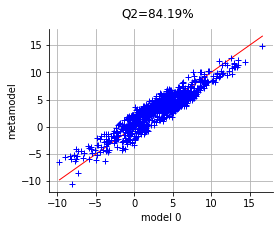

In [9]:
view = validate_polynomial_chaos(result, im.model, im.distributionX)

In order to have a closer look on the result, we use the `printCoefficientsTable` in order to print the first 10 coefficients. 

In [10]:
printCoefficientsTable(result)

Total number of coefficients :  56
# Indice, Multi-indice, Degree : Value
#0, [0,0,0] (0) : 3.5049783626206334
#1, [1,0,0] (1) : 1.6254291279668387
#2, [0,1,0] (1) : 6.830473686658678e-16
#3, [0,0,1] (1) : -8.018759267702791e-16
#4, [2,0,0] (2) : -1.0959115559483479e-15
#5, [1,1,0] (2) : -4.0505793164058446e-16
#6, [1,0,1] (2) : -9.879250195687916e-16
#7, [0,2,0] (2) : -0.6413919098131441
#8, [0,1,1] (2) : -8.933825901280557e-17
#9, [0,0,2] (2) : -3.668940151690947e-16
#10, [3,0,0] (3) : -1.2911039486376783


We see that there are 56 coefficients in the metamodel and that many of these coefficients are close to zero. If we print only coefficients greater than $10^{-14}$, we see that only a fraction of them are significant and that these significant coefficients have a relatively large polynomial degree.

In [11]:
printCoefficientsTable(result, threshold=1.0e-14)

Total number of coefficients :  56
# Indice, Multi-indice, Degree : Value
#0, [0,0,0] (0) : 3.5049783626206334
#1, [1,0,0] (1) : 1.6254291279668387
#7, [0,2,0] (2) : -0.6413919098131441
#10, [3,0,0] (3) : -1.2911039486376783
#15, [1,0,2] (3) : 1.3724300360555146
#30, [0,4,0] (4) : -1.6122740106725173
#35, [5,0,0] (5) : 0.20760614724812484
#40, [3,0,2] (5) : -1.0901427864755087
#49, [1,0,4] (5) : 0.4091795806643483


The previous experiments suggest to keep only the coefficients which are significant in the model: this is the topic of the next section.

## Use a model selection method

The `CleaningStrategy` has the following algorithm. On input, it considers only the first `maximumConsideredTerms` coefficients $a_\boldsymbol{\alpha}$. On output it selects the `mostSignificant` most significant coefficients. To do this, it uses the `significanceFactor` parameter.

In [12]:
def compute_cleaning_PCE(
    maximumConsideredTerms, mostSignificant, significanceFactor, verbose=False
):
    """
    Compute a PCE using CleaningStrategy.
    
    Parameters
    ----------
    maximumConsideredTerms : int
        The maximum number of coefficients considered by the algorithm during 
        intermediate steps.
        
    mostSignificant : int
        The maximum number of coefficients selected by the algorithm in 
        the final PCE.

    significanceFactor : float
        The relative part of any coefficient with respect to the maximum 
        coefficient.

    verbose : bool
        If set to True, print intermediate messages.
    
    Returns
    -------
    Q2 : float
        The Q2 score
    """
    adaptiveStrategy = ot.CleaningStrategy(
        multivariateBasis,
        maximumConsideredTerms,
        mostSignificant,
        significanceFactor,
        True,
    )
    chaosalgo = ot.FunctionalChaosAlgorithm(
        im.model, im.distributionX, adaptiveStrategy, projectionStrategy
    )
    chaosalgo.run()
    result = chaosalgo.getResult()
    score_Q2 = compute_polynomial_chaos_Q2(result, im.model, im.distributionX)
    if verbose:
        print("Q2 = %.2f%%" % (100.0 * score_Q2))
        printCoefficientsTable(result)
    return score_Q2

In the next cell, we consider at most 500 coefficients and keep only the 5 most significant coefficients. The factor is set to a relatively low value. 

In [13]:
maximumConsideredTerms = 500
mostSignificant = 5
significanceFactor = 1.0e-10
score_Q2 = compute_cleaning_PCE(
    maximumConsideredTerms, mostSignificant, significanceFactor, verbose=True
)

Q2 = -384.39%
Total number of coefficients :  6
# Indice, Multi-indice, Degree : Value
#0, [0,0,0] (0) : 3.5049783626206334
#1, [11,0,0] (11) : -1.6603684437609134
#2, [12,0,0] (12) : -4.269723903959842
#3, [0,12,0] (12) : -4.1339536842061095
#4, [0,0,12] (12) : -4.269723903959843
#5, [5,0,8] (13) : -0.052471216285748704


We see that when we keep only 5 coefficients among the first 500 ones, these coefficient have a very high polynomial degree. Indeed, it occurs that these poorly estimated coefficients have a high absolute value. Hence, the criteria selects them as significant coefficients, which leads to a poor metamodel

Let us reduce the number of considered coefficients and increase the number of selected coefficients. 

In [14]:
maximumConsideredTerms = 56
mostSignificant = 10
significanceFactor = 1.0e-10
score_Q2 = compute_cleaning_PCE(
    maximumConsideredTerms, mostSignificant, significanceFactor, verbose=True
)

Q2 = 85.75%
Total number of coefficients :  9
# Indice, Multi-indice, Degree : Value
#0, [0,0,0] (0) : 3.5049783626206334
#1, [1,0,0] (1) : 1.6254291279668387
#2, [0,2,0] (2) : -0.6413919098131441
#3, [3,0,0] (3) : -1.2911039486376783
#4, [1,0,2] (3) : 1.3724300360555146
#5, [0,4,0] (4) : -1.6122740106725173
#6, [5,0,0] (5) : 0.20760614724812484
#7, [3,0,2] (5) : -1.0901427864755087
#8, [1,0,4] (5) : 0.4091795806643483


When we keep only 10 coefficients among the first 56 ones, the polynomial chaos metamodel is much better: the coefficients are associated with a low polynomial degree, so that the quadrature rule estimates them with greater accuracy.

We would like to know which combination is best. In the following loop, we consider the maximum number of considered coefficients from 1 to 500 and the number of selected coefficients from 1 to 30. In order to produce the combinations, we use the `product` function from the `itertools` module. For each combination, we compute the $Q^2$ score and select the combination with highest $Q^2$ coefficient. As shown in [Müller & Guido, 2016], page 268 the computed $Q^2$ may be optimistic, but this is not the point of the current example. 

In [15]:
maximumConsideredTerms_list = list(range(1, 500, 50))  # From 1 to 500 by steps of 50
mostSignificant_list = list(range(1, 30, 5))  # From 1 to 30 by steps of 5
iterator = itertools.product(maximumConsideredTerms_list, mostSignificant_list)
best_score = 0.0
best_parameters = []
for it in iterator:
    maximumConsideredTerms, mostSignificant = it
    score_Q2 = compute_cleaning_PCE(
        maximumConsideredTerms, mostSignificant, significanceFactor
    )
    if score_Q2 > best_score:
        best_score = score_Q2
        best_parameters = [maximumConsideredTerms, mostSignificant]

print("Best Q2 = %.2f%%" % (100.0 * best_score))

maximumConsideredTerms, mostSignificant = best_parameters
print("Number of considered coefficients : ", maximumConsideredTerms)
print("Number of selected coefficients : ", mostSignificant)

Best Q2 = 86.15%
Number of considered coefficients :  101
Number of selected coefficients :  16


We see that the best solution could be to select at most 16 significant coefficients among the first 101 ones.

In [16]:
score_Q2 = compute_cleaning_PCE(
    maximumConsideredTerms, mostSignificant, significanceFactor, verbose=True
)

Q2 = 86.15%
Total number of coefficients :  12
# Indice, Multi-indice, Degree : Value
#0, [0,0,0] (0) : 3.5049783626206334
#1, [1,0,0] (1) : 1.6254291279668387
#2, [0,2,0] (2) : -0.6413919098131441
#3, [3,0,0] (3) : -1.2911039486376783
#4, [1,0,2] (3) : 1.3724300360555146
#5, [0,4,0] (4) : -1.6122740106725173
#6, [5,0,0] (5) : 0.20760614724812484
#7, [3,0,2] (5) : -1.0901427864755087
#8, [1,0,4] (5) : 0.4091795806643483
#9, [7,0,0] (7) : -0.20779864255813515
#10, [5,0,2] (7) : 0.1752921165560068


These parameters lead to a total number of coefficients equal to 12. Among the 16 most significant coefficients, only 12 satisfy the criteria. Most of the coefficients have a small polynomial degree although some have a total degree equal as large as 7. 

## Intermediate steps of the algorithm

If we set the `verbose` optional input argument of the `compute_cleaning_PCE` function to `True`, then intermediate messages are printed in the Terminal (but not in the Jupyter output). For each step of the adaptivity algorithm, the code prints some of the internal parameters of the algorithm. The datastructure uses several variables that we now describe.

- `Psi_k_p_` : the collection of functions in the current active polynomial multiindex set,
- `I_p_` : the list of indices of the selected coefficients based according to the enumeration rule,
- `addedPsi_k_ranks_` : the list of indices to add the multiindex set,
- `removedPsi_k_ranks_` : the list of indices to remove to the multiindex set,
- `conservedPsi_k_ranks_` : the index of the first polynomial in the selected multiindex set,
- `currentVectorIndex_` : the current value of the index in the full multiindex set, according to the enumeration rule.

Each time the selection method is called, it is passed a coefficient $a_\boldsymbol{\alpha}$ which is a new candidate to be considered by the algorithm. The first time the method is evaluated, the active multiindex set is empty, so that it must be filled with the first coefficients in the multiindex set, according to the enumeration rule. The second time (and up to the end of the algorithm), the candidate coefficient is considered to be added to the multiindex set.

Executing the function prints the following messages where the word "basis" is equivalent to "multiindex set".
```
INF - Build the iso-probabilistic transformation
INF - Same copula for input vector and basis
INF - Build the iso-probabilistic transformation
INF - Same copula for input vector and basis
INF - Work on output marginal 0 over 0
INF - Compute the initial basis
INF - Compute the coefficients
INF - Generate output data
INF - Initialize the proxy, reason=empty input sample
INF - Adapt the basis
INF - initial state:
INF -   vector index=16
INF -   coeffs  size=16
INF -   coeffs      =[3.50498,1.62543,6.83047e-16,-8.01876e-16,-1.09591e-15,-4.05058e-16,-9.87925e-16,-0.641392,-8.93383e-17,-3.66894e-16,-1.2911,-6.33174e-17,-4.59702e-17,-1.53523e-16,-1.9082e-17,1.37243]#16
INF -   I_p     size=16
INF -   I_p         =[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
INF - final state:
INF -   vector index=17 / 101 (16.8%)
INF -   coeffs  size=5
INF -   coeffs      =[3.50498,1.62543,-0.641392,-1.2911,1.37243]
INF -   rem coeffs  =[6.83047e-16,-8.01876e-16,-1.09591e-15,-4.05058e-16,-9.87925e-16,-8.93383e-17,-3.66894e-16,-6.33174e-17,-4.59702e-17,-1.53523e-16,-1.9082e-17]#11
INF -   I_p     size=6
INF -   I_p         =[0,1,7,10,15,16]
INF - Compute the coefficients
INF - Initialize the proxy, reason=new basis
INF - Adapt the basis
INF - initial state:
INF -   vector index=17
INF -   coeffs  size=6
INF -   coeffs      =[3.50498,1.62543,-0.641392,-1.2911,1.37243,-1.19653e-15]
INF -   I_p     size=6
INF -   I_p         =[0,1,7,10,15,16]
INF - final state:
INF -   vector index=18 / 101 (17.8%)
INF -   coeffs  size=5
INF -   coeffs      =[3.50498,1.62543,-0.641392,-1.2911,1.37243]
INF -   rem coeffs  =[-1.19653e-15]
INF -   I_p     size=6
INF -   I_p         =[0,1,7,10,15,17]
[...]
```


In order to process the previous content, we save it into a text file and read the selected coefficients at each step. On output, the variable `list_of_selected_indices` is a list, where each item is the list of integers corresponding to the indices of the coefficients in the active multiindex set.

In [23]:
f = open("selection_output.txt","r")
lines = f.readlines()

list_of_selected_indices = []
line_index = 0
is_state_initial = True
step_index = 0
for line in lines:
    line_index += 1
    if line[0:20] == "INF - initial state:":
        is_state_initial = True
        step_index += 1
    if line[0:18] == "INF - final state:":
        #print("Line #", line_index, ", final state")
        is_state_initial = False
    if line[0:21] == "INF -   I_p         =":
        indices_str = line[22:-2]
        indices_str_list = indices_str.split(",")
        indices = []
        for index in indices_str_list:
            indices.append(int(index))
        if is_state_initial:
            print("Step %d" % (step_index))
        else:
            print("  ", indices)
        if len(list_of_selected_indices) == 0:
            # If the list of indices is empty, add the first indices
            list_of_selected_indices.append(indices)
        elif not is_state_initial:
            # If this is the final state, add the indices
            list_of_selected_indices.append(indices)

Step 1
   [0, 1, 7, 10, 15, 16]
Step 2
   [0, 1, 7, 10, 15, 17]
Step 3
   [0, 1, 7, 10, 15, 18]
Step 4
   [0, 1, 7, 10, 15, 19]
Step 5
   [0, 1, 7, 10, 15, 20]
Step 6
   [0, 1, 7, 10, 15, 21]
Step 7
   [0, 1, 7, 10, 15, 22]
Step 8
   [0, 1, 7, 10, 15, 23]
Step 9
   [0, 1, 7, 10, 15, 24]
Step 10
   [0, 1, 7, 10, 15, 25]
Step 11
   [0, 1, 7, 10, 15, 26]
Step 12
   [0, 1, 7, 10, 15, 27]
Step 13
   [0, 1, 7, 10, 15, 28]
Step 14
   [0, 1, 7, 10, 15, 29]
Step 15
   [0, 1, 7, 10, 15, 30]
Step 16
   [0, 1, 7, 10, 15, 30, 31]
Step 17
   [0, 1, 7, 10, 15, 30, 32]
Step 18
   [0, 1, 7, 10, 15, 30, 33]
Step 19
   [0, 1, 7, 10, 15, 30, 34]
Step 20
   [0, 1, 7, 10, 15, 30, 35]
Step 21
   [0, 1, 7, 10, 15, 30, 35, 36]
Step 22
   [0, 1, 7, 10, 15, 30, 35, 37]
Step 23
   [0, 1, 7, 10, 15, 30, 35, 38]
Step 24
   [0, 1, 7, 10, 15, 30, 35, 39]
Step 25
   [0, 1, 7, 10, 15, 30, 35, 40]
Step 26
   [0, 1, 7, 10, 15, 30, 35, 40, 41]
Step 27
   [0, 1, 7, 10, 15, 30, 35, 40, 42]
Step 28
   [0, 1, 7, 10, 15, 30, 3

The previous text allows to understand what exactly happens in the algorithm, where the significant threshold is $\epsilon = 10^{-10}$. 
- On the first step, the initial basis is empty and filled with the indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]. The greatest coefficient in absolute value is $a_0 = 3.505$, which leads to the threshold $\epsilon |a_0| = 3.505 \times 10^{-10}$. Most of the considered coefficient are, however, too close to zero. This is why only the coefficients [0, 1, 7, 10, 15] are kept in the basis. The corresponding coefficients are [3.505, 1.625,-0.6414, -1.291, 1.372]. 
- On the second step, the candidate index 16 is considered. Its coefficient is $a_{16} = -1.197 \times 10^{-15}$, which is much too low to be selected. Hence, the basis is unchanged and the active multiindex set is [0, 1, 7, 10, 15] on the end of this step.
- From the step 3 to the step 15, the active multiindex set is unchanged, because no considered coefficient becomes greater than the threshold.
- On step 16, the candidate index 30 is considered, with corresponding coefficient $a_{30} = -1.612$. Since this coefficient has an absolute value greater than the threshold, it gets selected and the active multiindex set is [0, 1, 7, 10, 15, 30] on the end of this step.
- On the last step, the selected multiindex set contains the indices [0, 1, 7, 10, 15, 30, 35, 40, 49, 84, 89, 98] and the corresponding coefficients are [3.508, 1.625, -0.6414, -1.291, 1.372, -1.613, 0.2076, -1.090, 0.4092, -0.2078, 0.1753, -0.3250]. 

We see that the algorithm was able so select 12 coefficients in the first 101 coefficients considered by the algorithm. It could have selected more coefficients since we provided 16 slots to fill thanks to the `mostSignificant` parameter. The considered coefficients were, however, too close to zero and were below the threshold. 

The next cell prints the first 10 selected multiindices.

In [18]:
for indices in list_of_selected_indices[0:10]:
    print(indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 7, 10, 15, 16]
[0, 1, 7, 10, 15, 17]
[0, 1, 7, 10, 15, 18]
[0, 1, 7, 10, 15, 19]
[0, 1, 7, 10, 15, 20]
[0, 1, 7, 10, 15, 21]
[0, 1, 7, 10, 15, 22]
[0, 1, 7, 10, 15, 23]
[0, 1, 7, 10, 15, 24]


The next cell prints the last 10 selected multiindices.

In [19]:
for indices in list_of_selected_indices[-11:-1]:
    print(indices)

[0, 1, 7, 10, 15, 30, 35, 40, 49, 84, 89, 92]
[0, 1, 7, 10, 15, 30, 35, 40, 49, 84, 89, 93]
[0, 1, 7, 10, 15, 30, 35, 40, 49, 84, 89, 94]
[0, 1, 7, 10, 15, 30, 35, 40, 49, 84, 89, 95]
[0, 1, 7, 10, 15, 30, 35, 40, 49, 84, 89, 96]
[0, 1, 7, 10, 15, 30, 35, 40, 49, 84, 89, 97]
[0, 1, 7, 10, 15, 30, 35, 40, 49, 84, 89, 98]
[0, 1, 7, 10, 15, 30, 35, 40, 49, 84, 89, 98, 99]
[0, 1, 7, 10, 15, 30, 35, 40, 49, 84, 89, 98, 100]
[0, 1, 7, 10, 15, 30, 35, 40, 49, 84, 89, 98]
